In [ ]:
# pip install spacy
# import spacy.cli
# spacy.cli.download("fr_core_news_sm")

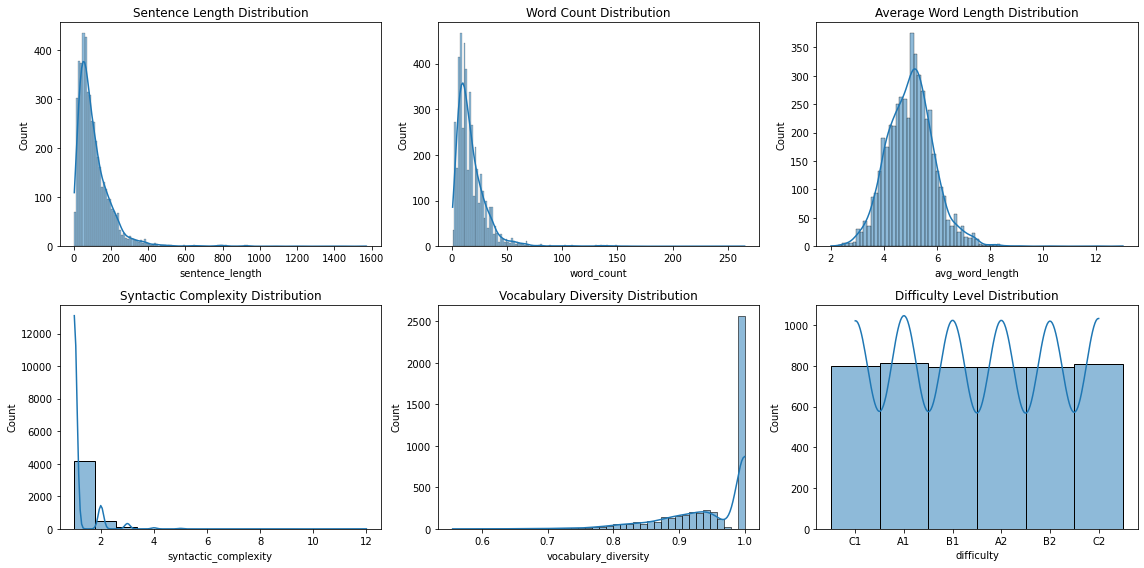

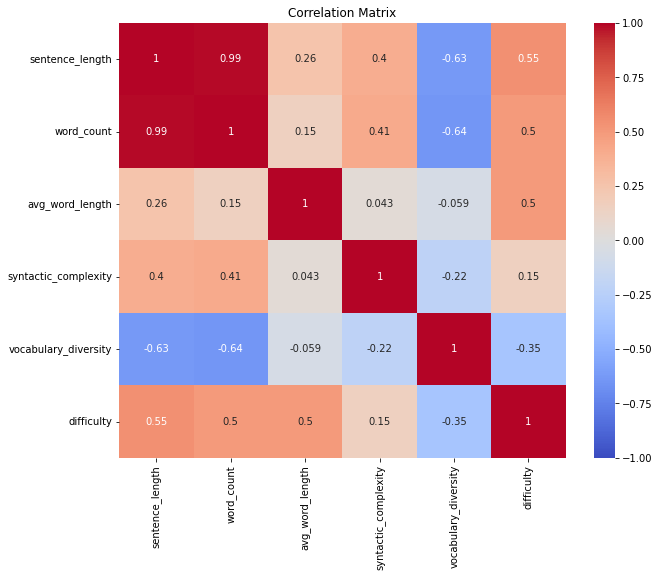

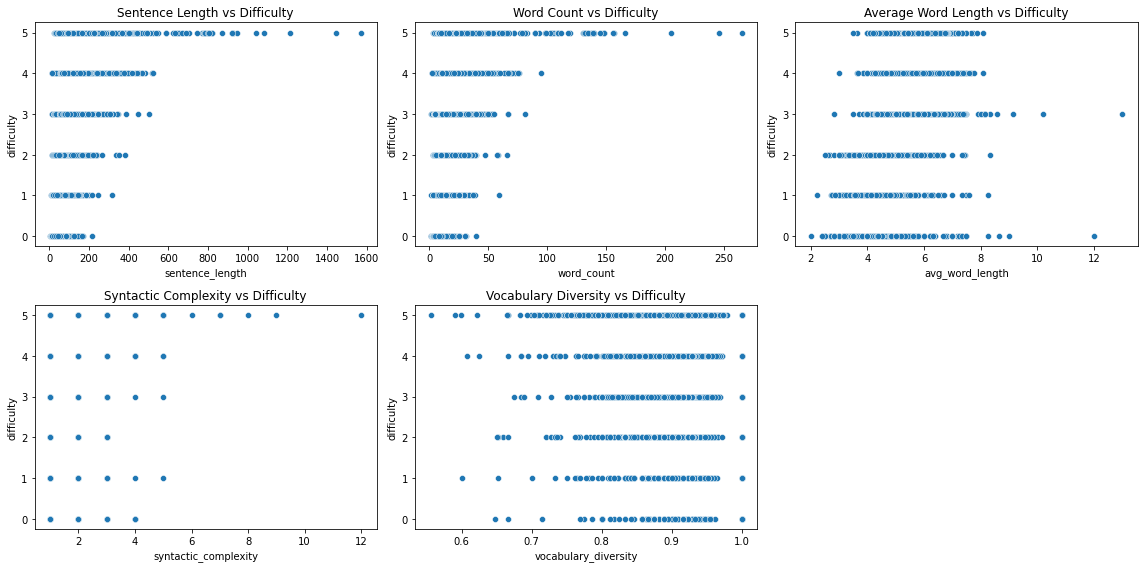

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy

# Load French language model from spaCy
nlp = spacy.load('fr_core_news_sm')

data = pd.read_csv('https://raw.githubusercontent.com/GiammarcoBozzelli/DSML/main/DATA/training_data.csv')

# Feature Engineering: Add linguistic attributes
def syntactic_complexity(sentence):
    doc = nlp(sentence)
    return len(list(doc.sents))  # Number of clauses (approximated by number of sentences)

def vocabulary_diversity(sentence):
    words = sentence.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0  # Type-Token Ratio (TTR)

data['sentence_length'] = data['sentence'].apply(len)
data['word_count'] = data['sentence'].apply(lambda x: len(x.split()))
data['avg_word_length'] = data['sentence'].apply(lambda x: np.mean([len(word) for word in x.split()]))
data['syntactic_complexity'] = data['sentence'].apply(syntactic_complexity)
data['vocabulary_diversity'] = data['sentence'].apply(vocabulary_diversity)

# Visualizing the distributions
plt.figure(figsize=(16, 8))

# Sentence length distribution
plt.subplot(2, 3, 1)
sns.histplot(data['sentence_length'], kde=True)
plt.title('Sentence Length Distribution')

# Word count distribution
plt.subplot(2, 3, 2)
sns.histplot(data['word_count'], kde=True)
plt.title('Word Count Distribution')

# Average word length distribution
plt.subplot(2, 3, 3)
sns.histplot(data['avg_word_length'], kde=True)
plt.title('Average Word Length Distribution')

# Syntactic complexity distribution
plt.subplot(2, 3, 4)
sns.histplot(data['syntactic_complexity'], kde=True)
plt.title('Syntactic Complexity Distribution')

# Vocabulary diversity distribution
plt.subplot(2, 3, 5)
sns.histplot(data['vocabulary_diversity'], kde=True)
plt.title('Vocabulary Diversity Distribution')

# Difficulty level distribution
plt.subplot(2, 3, 6)
sns.histplot(data['difficulty'], kde=True)
plt.title('Difficulty Level Distribution')

plt.tight_layout()
plt.show()


label_mapping = {'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}
data['difficulty'] = data['difficulty'].map(label_mapping)

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[['sentence_length', 'word_count', 'avg_word_length', 'syntactic_complexity', 'vocabulary_diversity', 'difficulty']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
plt.figure(figsize=(16, 8))

# Scatter plot: Sentence Length vs Difficulty
plt.subplot(2, 3, 1)
sns.scatterplot(x='sentence_length', y='difficulty', data=data)
plt.title('Sentence Length vs Difficulty')

# Scatter plot: Word Count vs Difficulty
plt.subplot(2, 3, 2)
sns.scatterplot(x='word_count', y='difficulty', data=data)
plt.title('Word Count vs Difficulty')

# Scatter plot: Average Word Length vs Difficulty
plt.subplot(2, 3, 3)
sns.scatterplot(x='avg_word_length', y='difficulty', data=data)
plt.title('Average Word Length vs Difficulty')

# Scatter plot: Syntactic Complexity vs Difficulty
plt.subplot(2, 3, 4)
sns.scatterplot(x='syntactic_complexity', y='difficulty', data=data)
plt.title('Syntactic Complexity vs Difficulty')

# Scatter plot: Vocabulary Diversity vs Difficulty
plt.subplot(2, 3, 5)
sns.scatterplot(x='vocabulary_diversity', y='difficulty', data=data)
plt.title('Vocabulary Diversity vs Difficulty')

plt.tight_layout()
plt.show()

